![Alt text](https://files.oaiusercontent.com/file-twSVFWMSPNjvdCN1fveokdce?se=2024-10-22T03%3A36%3A08Z&sp=r&sv=2024-08-04&sr=b&rscc=max-age%3D604800%2C%20immutable%2C%20private&rscd=attachment%3B%20filename%3Dd50ecdd6-0531-4a9d-9958-6bfd3ae56f18.webp&sig=vUnepYxVADpb6kU/qMxnaXKw%2BCK8QZuxytKqI546p7k%3D)

# Bayesian Networks

Bayesian models are based on {Bayes' Theorem}, a mathematical formula used to update probabilities as more evidence or information becomes available. Bayesian reasoning is highly flexible and can be applied to various types of machine learning and inference problems, especially when dealing with uncertainty.



$[
P(A \mid B) = \frac{P(B \mid A) \cdot P(A)}{P(B)}
]$


  item $[(P(A \mid B))]$ is the ${posterior probability}$: the probability of hypothesis \(A\) being true given the evidence \(B\).
  \item $[(P(B \mid A))]$ is the ${likelihood}$: the probability of observing \(B\) given that \(A\) is true.
  \(P(A)\) is the ${prior probability}$: the initial belief about \(A\) before seeing any evidence.
  \(P(B)\) is the ${marginal likelihood}$ or the normalizing constant, representing the total probability of observing \(B\).
  
-----------

${How Bayesian Models Work in Machine Learning}$

In machine learning, Bayesian models are used to:

${Update beliefs}$ based on new data.
   Provide \textbf{probabilistic predictions} rather than deterministic ones.
   Deal effectively with \textbf{uncertainty}, which is often present in real-world data.$

-----------

${Bayesian Networks}$

A ${Bayesian network}$ is a probabilistic graphical model that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). Each node in the graph represents a variable, and edges represent dependencies. The key idea is to break down the joint probability of the entire system into a product of conditional probabilities.

-----------
${Steps in a Bayesian Network}$

  ${Representation}$: It uses a graph where nodes represent variables and edges denote dependencies.
  ${Joint Probability Distribution}$: Bayesian networks break down complex joint probabilities into smaller, manageable parts.
  $[
  P(X_1, X_2, ..., X_n) = \prod_{i=1}^{n} P(X_i \mid Parents(X_i))
  ]$
  ${Inference}$: Once trained, you can use the network to answer probabilistic queries (e.g., given certain evidence, what is the probability that a specific event happens?).

-----------
${Example: Spam Filtering Using Bayesian Networks}$

In a spam filter:

   Each email is represented as a set of words (features).
   The model computes the probability that an email is spam given the words in the email (evidence).
   The model uses Bayes' Theorem to update the probability of an email being spam based on the words it contains and the likelihood that these words appear in spam emails.

-----------
${How- It -Works -in -Spam -Filtering}$

  ${Prior Probability}$: We start with a prior belief about whether emails are spam or not based on the training data.
  ${Likelihood}$: We calculate the probability of specific words appearing in spam or non-spam emails.
  ${Posterior Probability}$: Using Bayes’ Theorem, we compute the posterior probability that an email is spam given the words it contains.

-----------
${Why Use Bayesian Models?}$

  ${Interpretable}$: Bayesian models provide interpretable results in terms of probabilities.
  ${Flexibility}$: You can incorporate prior knowledge or expert beliefs into the model.
  ${Handling Uncertainty}$: They excel in uncertain environments by providing probabilistic outputs.
  ${Sequential Learning}$: You can update the model with new data without retraining from scratch.

-----------
${Application of Bayesian Models}$


  ${Spam filtering}$ (like our example)
  ${Medical diagnosis}$: Predicting diseases based on symptoms.
  ${Risk assessment}$: Evaluating risks in finance, insurance, or supply chain.
  ${Speech and image recognition}$: Dealing with uncertain predictions.

-----------
${Key Libraries for Bayesian Models}$

  ${pgmpy}$: For working with Bayesian Networks and Probabilistic Graphical Models.
  ${pymc3}$ and ${pystan}$: For general Bayesian statistical modeling.


In [ ]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
def load_data():
    url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/sms.tsv'
    data = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])
    data['label'] = data['label'].map({'ham': 0, 'spam': 1})  # Convert labels to binary
    return data

In [ ]:
def preprocess_data(data):
    X = data['message']
    y = data['label']


    vectorizer = CountVectorizer(stop_words='english', lowercase=True)
    X_transformed = vectorizer.fit_transform(X)

    return X_transformed, y, vectorizer

In [ ]:
def train_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


    model = MultinomialNB()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    return model, accuracy, cm, X_test, y_test

In [ ]:
def predict_spam(model, vectorizer, new_email):
    email_transformed = vectorizer.transform([new_email])
    prediction = model.predict(email_transformed)
    return 'Spam' if prediction == 1 else 'Not Spam'

In [ ]:
if __name__ == "__main__":
    data = load_data()
    X_transformed, y, vectorizer = preprocess_data(data)
    model, accuracy, cm, X_test, y_test = train_model(X_transformed, y)

    print(f"Model Accuracy: {accuracy * 100:.2f}%")
    print("Confusion Matrix:")
    print(cm)


    new_email = "Win a brand new car! Claim your prize now!"
    prediction = predict_spam(model, vectorizer, new_email)
    print(f"Prediction for new email: {prediction}")

Model Accuracy: 98.09%
Confusion Matrix:
[[1426   22]
 [  10  214]]
Prediction for new email: Spam


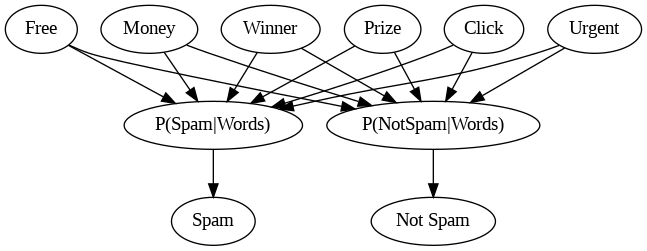

In [ ]:
from graphviz import Digraph
from IPython.display import Image

def create_advanced_bayes_net():

    bayes_net = Digraph('Bayesian Network for Spam Filter', format='png')


    bayes_net.node('Spam', 'Spam')
    bayes_net.node('NotSpam', 'Not Spam')


    words = ['Free', 'Money', 'Winner', 'Prize', 'Click', 'Urgent']
    for word in words:
        bayes_net.node(word, word)

    bayes_net.node('P(Spam|Words)', 'P(Spam|Words)')
    bayes_net.node('P(NotSpam|Words)', 'P(NotSpam|Words)')

    for word in words:
        bayes_net.edge(word, 'P(Spam|Words)')
        bayes_net.edge(word, 'P(NotSpam|Words)')

    bayes_net.edge('P(Spam|Words)', 'Spam')
    bayes_net.edge('P(NotSpam|Words)', 'NotSpam')
    bayes_net.render('advanced_bayesian_spam_filter')

    return Image('advanced_bayesian_spam_filter.png')

create_advanced_bayes_net()
